In [15]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

datafile = 'KernelDensity_Data.txt'
data = np.loadtxt(datafile, usecols=(0,1), comments='#')

x = data[:,0]
y = data[:,1]

In [16]:
def plot_data():
    plt.scatter(x, y, color='k')
    plt.xlim(0,39)
    plt.ylim(0,0.9)
    return

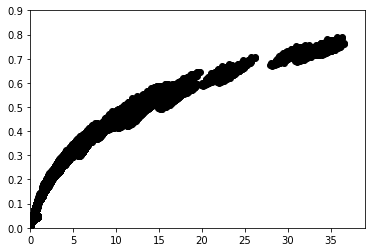

In [17]:
plot_data()

In [31]:
import numpy as np
from matplotlib import pyplot as plt

from scipy import sparse
from sklearn.mixture import GaussianMixture

from astroML.clustering import HierarchicalClustering, get_graph_segments

In [21]:
X = np.vstack([x[0:1000],y[0:1000]]).T

In [67]:
#------------------------------------------------------------
# Compute the MST clustering model
n_neighbors    = 10  
edge_cutoff    = 0.9 # ?
cluster_cutoff = 10  # ?
model = HierarchicalClustering(n_neighbors=10, edge_cutoff=edge_cutoff, min_cluster_size=cluster_cutoff)
model.fit(X)

In [68]:
print (" scale: %2g" % np.percentile(model.full_tree_.data, 100 * edge_cutoff))

n_components = model.n_components_
labels = model.labels_

 scale: 0.00341963


In [69]:
print(n_components)

6


In [70]:

#------------------------------------------------------------
# Get the x, y coordinates of the beginning and end of each line segment
T_x, T_y = get_graph_segments(model.X_train_,
                              model.full_tree_)
T_trunc_x, T_trunc_y = get_graph_segments(model.X_train_,
                                          model.cluster_graph_)

/Users/juan/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


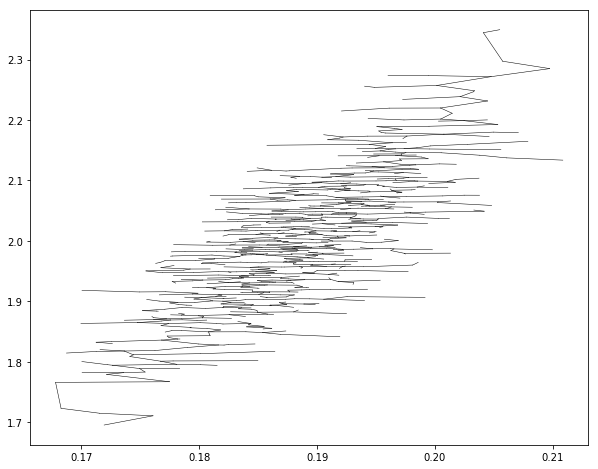

In [71]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(T_y, T_x, c='k', lw=0.5)
fig.show()
#ax.set_xlim(ymin, ymax)
#ax.set_ylim(xmin, xmax)


In [72]:
xmin, xmax = np.min(x), np.max(x)
ymin, ymax = np.min(y), np.max(y)

In [75]:
print(n_components)

6


In [76]:
i = 0
ind = (labels == i)
Npts = ind.sum()
Nclusters = int(min(12, Npts / 5))

In [77]:
print(ind)

[ True False False False  True  True  True  True False False  True False
 False  True  True  True  True False False False  True  True  True False
  True False  True  True  True  True False  True  True False False False
  True  True False False  True  True  True  True  True  True  True  True
 False False  True  True  True  True  True False  True  True  True False
  True  True  True False False  True  True  True  True False  True  True
  True False  True  True  True  True  True  True False  True  True False
  True  True False  True  True  True  True  True  True False  True  True
  True False  True False False  True  True False  True  True  True  True
 False  True False  True False  True False  True False False  True  True
 False False False  True  True  True False  True  True False  True  True
  True  True  True  True  True False  True  True  True  True False  True
  True  True  True  True False False False  True  True  True False  True
  True False  True  True  True  True  True False Fa

In [82]:
print(Npts)

686


In [83]:
print(Nclusters)

12


In [94]:
gmm = GaussianMixture(Nclusters).fit(X[ind])

In [ ]:
GaussianMixture().fit()

In [92]:
dens = np.exp(gmm.score(Xgrid))

In [93]:
print(dens)

0.0


In [87]:
density += dens / dens.max()

/Users/juan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


In [88]:
dens

0.0

In [37]:
#------------------------------------------------------------
# Fit a GMM to each individual cluster
#Nx = 100
#Ny = 250
Nx = 100
Ny = 100
Xgrid = np.vstack(map(np.ravel, np.meshgrid(np.linspace(xmin, xmax, Nx), np.linspace(ymin, ymax, Ny)))).T
density = np.zeros(Xgrid.shape[0])

#for i in range(n_components):
for i in range(1):
    ind = (labels == i)
    Npts = ind.sum()
    Nclusters = int(min(12, Npts / 5))

    #print(ind)
    #print(Nclusters)
    gmm = GaussianMixture(Nclusters).fit(X[ind])
    dens = np.exp(gmm.score(Xgrid))
    density += dens / dens.max()

density = density.reshape((Ny, Nx))


/Users/juan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


In [38]:
from matplotlib.colors import LogNorm

/Users/juan/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:929: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/Users/juan/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:933: RuntimeWarning: divide by zero encountered in log
  resdat /= (np.log(vmax) - np.log(vmin))
/Users/juan/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:933: RuntimeWarning: divide by zero encountered in true_divide
  resdat /= (np.log(vmax) - np.log(vmin))


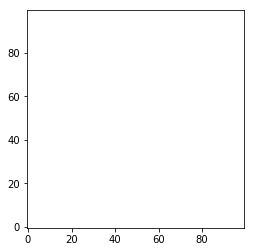

In [41]:
plt.imshow(density.T, origin='lower', cmap=plt.cm.hot_r, norm=LogNorm())